In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

In [ ]:
train.info()

## Cabin

Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

### '/' 형태로 되어있는 Cabin 칼럼을 Deck, number, side로 바꿔주어

### -> Cabin_deck / Cabin_number / Cabin_side 칼럼 생성

In [ ]:
# '/'로 split하기 위해서 '/'가 있는 형태로 바꿔주고 다시 NULL값 채우기
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

In [ ]:
#다시 NULL 값 채우기
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan

test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

### Cabin 칼럼 삭제

In [6]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [7]:
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S


### PassengerId 앞 부분을 따와 'group' 칼럼 생성

In [8]:
train['group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P,9276
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S,9278
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S,9279
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,9280


### group_size 칼럼을 생성해 각 승객별 속한 그룹의 인원수를 체크

In [9]:
train['group_size'] = train['group'].apply(lambda x: train['group'].value_counts()[x])

### 같은 그룹이면 같은 Cabin_deck/number/side임을 보기 위해 group_size가 1보다 큰 그룹들만 추출

In [10]:
train['group_size'] = train['group'].apply(lambda x: train['group'].value_counts()[x])
train_gs = train[train['group_size']>1]
train_gs

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,group,group_size
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,2
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2.0,S,6,2
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0.0,S,6,2
9,0008_01,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1.0,P,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True,A,97.0,P,9275,3
8686,9275_02,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False,A,97.0,P,9275,3
8687,9275_03,Europa,NaN,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True,A,97.0,P,9275,3
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S,9280,2


In [11]:
g_cd = pd.DataFrame(train_gs.groupby(['group'])['Cabin_deck'].value_counts())
g_cd.columns = ['count']
g_cd = g_cd.reset_index()
g_cd

,group,Cabin_deck,count
0,3,A,2
1,6,F,1
2,6,G,1
3,8,B,3
4,17,F,1
...,...,...,...
1849,9267,E,2
1850,9272,F,1
1851,9272,G,1
1852,9275,A,3


In [12]:
sum(g_cd.duplicated('group'))

442

### 같은 group이어도 1854개 중 442개의 Cabin_deck이 일치하지 않았음

### -> 20% 정도만 다르므로 결측치 처리에 이용

<AxesSubplot: xlabel='group', ylabel='Count'>

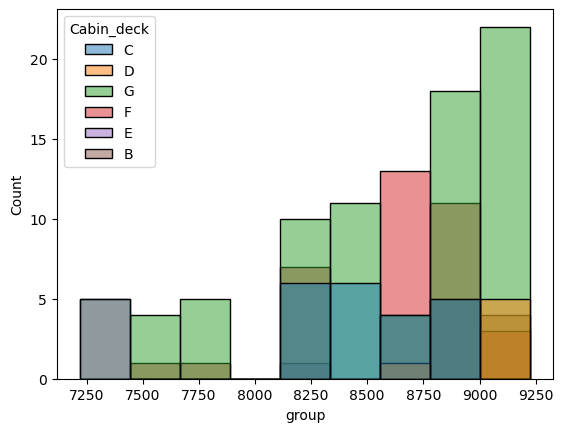

In [13]:
import seaborn as sns
more_4_gb = train[train['group_size']>4]
sns.histplot(more_4_gb[more_4_gb['group']>7000], x = 'group', hue = 'Cabin_deck')

# ??

In [14]:
g_cn = pd.DataFrame(train_gs.groupby(['group'])['Cabin_number'].value_counts())
g_cn.columns = ['count']
g_cn = g_cn.reset_index()
g_cn

,group,Cabin_number,count
0,3,0.0,2
1,6,0.0,1
2,6,2.0,1
3,8,1.0,3
4,17,0.0,1
...,...,...,...
1848,9267,607.0,2
1849,9272,1507.0,1
1850,9272,1894.0,1
1851,9275,97.0,3


In [15]:
sum(g_cn.duplicated('group'))

441

### 441개의 데이터가 같은 group이어도 같은 Cabin_number가 일치하지 않음.

### -> 20% 정도만 다르므로 결측치 처리에 이용

In [16]:
g_cs = pd.DataFrame(train_gs.groupby(['group'])['Cabin_side'].value_counts())
g_cs.columns = ['count']
g_cs = g_cs.reset_index()
g_cs

,group,Cabin_side,count
0,3,S,2
1,6,S,2
2,8,P,3
3,17,P,2
4,20,S,6
...,...,...,...
1407,9252,P,2
1408,9267,S,2
1409,9272,P,2
1410,9275,P,3


In [17]:
sum(g_cs.duplicated('group'))

0

<AxesSubplot: xlabel='group', ylabel='count'>

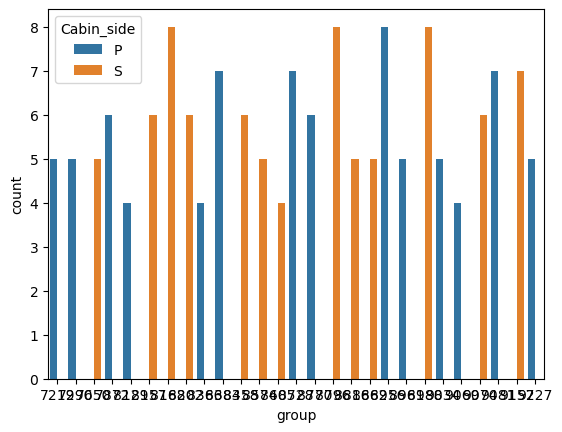

In [18]:
sns.countplot(more_4_gb[more_4_gb['group']>7000], x = 'group', hue = 'Cabin_side')

### !! 같은 group이면 같은 모두 Cabin_side임을 확인하였음.

### 그룹별로 Cabin deck/number/side 데이터 종류를 분류한 데이터프레임 생성

### -> 같은 그룹인데 다른 Cabin ? 에 속했는지 여부를 따지기 위함

In [39]:
train_g_cd = train.groupby('group')['Cabin_deck'].value_counts()
train_g_cd = pd.DataFrame(train_g_cd)
train_g_cd.columns = ['count']

train_g_cd = train_g_cd.reset_index()
train_g_cd[6510:6512]

,group,Cabin_deck,count
6510,9208,F,1
6511,9208,G,1


In [22]:
train_g_cn = train.groupby('group')['Cabin_number'].value_counts()
train_g_cn = pd.DataFrame(train_g_cn)
train_g_cn.columns = ['count']

train_g_cn = train_g_cn.reset_index()
train_g_cn

,group,Cabin_number,count
0,1,0.0,1
1,2,0.0,1
2,3,0.0,2
3,4,1.0,1
4,5,0.0,1
...,...,...,...
6554,9275,97.0,3
6555,9276,98.0,1
6556,9278,1499.0,1
6557,9279,1500.0,1


In [23]:
train_g_cs = train.groupby('group')['Cabin_side'].value_counts()
train_g_cs = pd.DataFrame(train_g_cs)
train_g_cs.columns = ['count']

train_g_cs = train_g_cs.reset_index()
train_g_cs

,group,Cabin_side,count
0,1,P,1
1,2,S,1
2,3,S,2
3,4,S,1
4,5,P,1
...,...,...,...
6113,9275,P,3
6114,9276,P,1
6115,9278,S,1
6116,9279,S,1


### Cabin_deck/number/side 칼럼 결측치 채우기

### Cabin에서 NULL값이었던 인덱스

In [40]:
cab_null_idx = train[train['Cabin_deck'].isnull()].index
cab_null_idx

Int64Index([  15,   93,  103,  222,  227,  251,  260,  272,  280,  295,
            ...
            8043, 8066, 8110, 8168, 8202, 8209, 8475, 8485, 8509, 8656],
           dtype='int64', length=199)

In [41]:
train.loc[cab_null_idx, 'group']

15        12
93       101
103      110
222      239
227      244
        ... 
8209    8772
8475    9057
8485    9069
8509    9081
8656    9233
Name: group, Length: 199, dtype: int32

### 같은 group이면 -> 같은 Cabin ?에 속하게 만들기

#### ** 결측치 데이터만 한 group에만 속할 수 있다 -> if/else문으로 처리해주기

In [46]:
train[train['group']==12]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,group,group_size
15,0012_01,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,NaN,NaN,NaN,12,1


In [47]:
train[train['group']==244]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,group,group_size
227,0244_01,Mars,True,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,NaN,NaN,NaN,244,2
228,0244_02,Mars,True,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True,F,47.0,S,244,2


In [48]:
train_g_cd[train_g_cd['group']==244]

,group,Cabin_deck,count
173,244,F,1


In [ ]:
train.loc[cab_null_idx, 'Cabin_deck'] = train.loc[cab_null_idx, 'group'].apply(lambda x: train['Cabin_deck'].mode()[0] if sum(train_g_cd['group']==x)==0 else train_g_cd[train_g_cd['group']==x]['Cabin_deck'])
train.loc[cab_null_idx, 'Cabin_number'] = train.loc[cab_null_idx, 'group'].apply(lambda x: train['Cabin_number'].mode()[0] if sum(train_g_cn['group']==x)==0 else train_g_cn[train_g_cn['group']==x]['Cabin_number'])
train.loc[cab_null_idx, 'Cabin_side'] = train.loc[cab_null_idx, 'group'].apply(lambda x: train['Cabin_side'].mode()[0] if sum(train_g_cs['group']==x)==0 else train_g_cs[train_g_cs['group']==x]['Cabin_side'])

In [ ]:
print(train['Cabin_deck'].isnull().sum())
print(train['Cabin_number'].isnull().sum())
print(train['Cabin_side'].isnull().sum())

## Destination -> 결측치 182개 존재

In [ ]:
train['Destination'].value_counts(dropna = False)

In [ ]:
train

In [ ]:
train.groupby(['HomePlanet'])['Destination'].value_counts()

In [ ]:
sns.countplot(train, x = 'HomePlanet', hue = 'Destination')

### HomePlanet이 Earth, Mars일 경우 대부분 TRAPPIST-1e에 도착

### -> HomePlanet이 Europa인 경우도 TRAPPIST-1e에 가장 많은 사람이 도착하므로 최빈값인 TRAPPIST-1e로 결측치 채우기

In [ ]:
train['Destination'].fillna(train['Destination'].mode()[0], inplace = True)

In [ ]:
train['Destination'].isnull().sum()

In [ ]:
train.isnull().sum()

### 전처리를 위해 생성했던 칼럼 ['group', 'group_size'] 삭제

In [ ]:
train.drop(['group', 'group_size'], axis = 1, inplace = True)

### 최종 NULL값 확인(Destinaiton / Cabin)

In [ ]:
train.isnull().sum()